In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from ast import literal_eval
from numpy import nan
import xgboost
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from fancyimpute import KNN
import missingno as msno
from copy import deepcopy
import impyute.imputation.cs.mice as mice_imputation

pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

In [56]:
df = pd.read_csv("output/NAG_DETAILS_v8.csv")

In [60]:
def group_lifespan(x):
    if x<=2:
        return 1
    elif 2<x<=5:
        return 2
    elif 5<x<=14:
        return 3
    elif x>14:
        return 4
    
df['lifespan_group'] = df['lifespan'].apply(group_lifespan)

In [36]:
# missingdata_df = df.columns[df.isnull().any()].tolist()
# # df[missingdata_df].describe().T.to_csv("missing_column_stats_before.csv", index=False)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


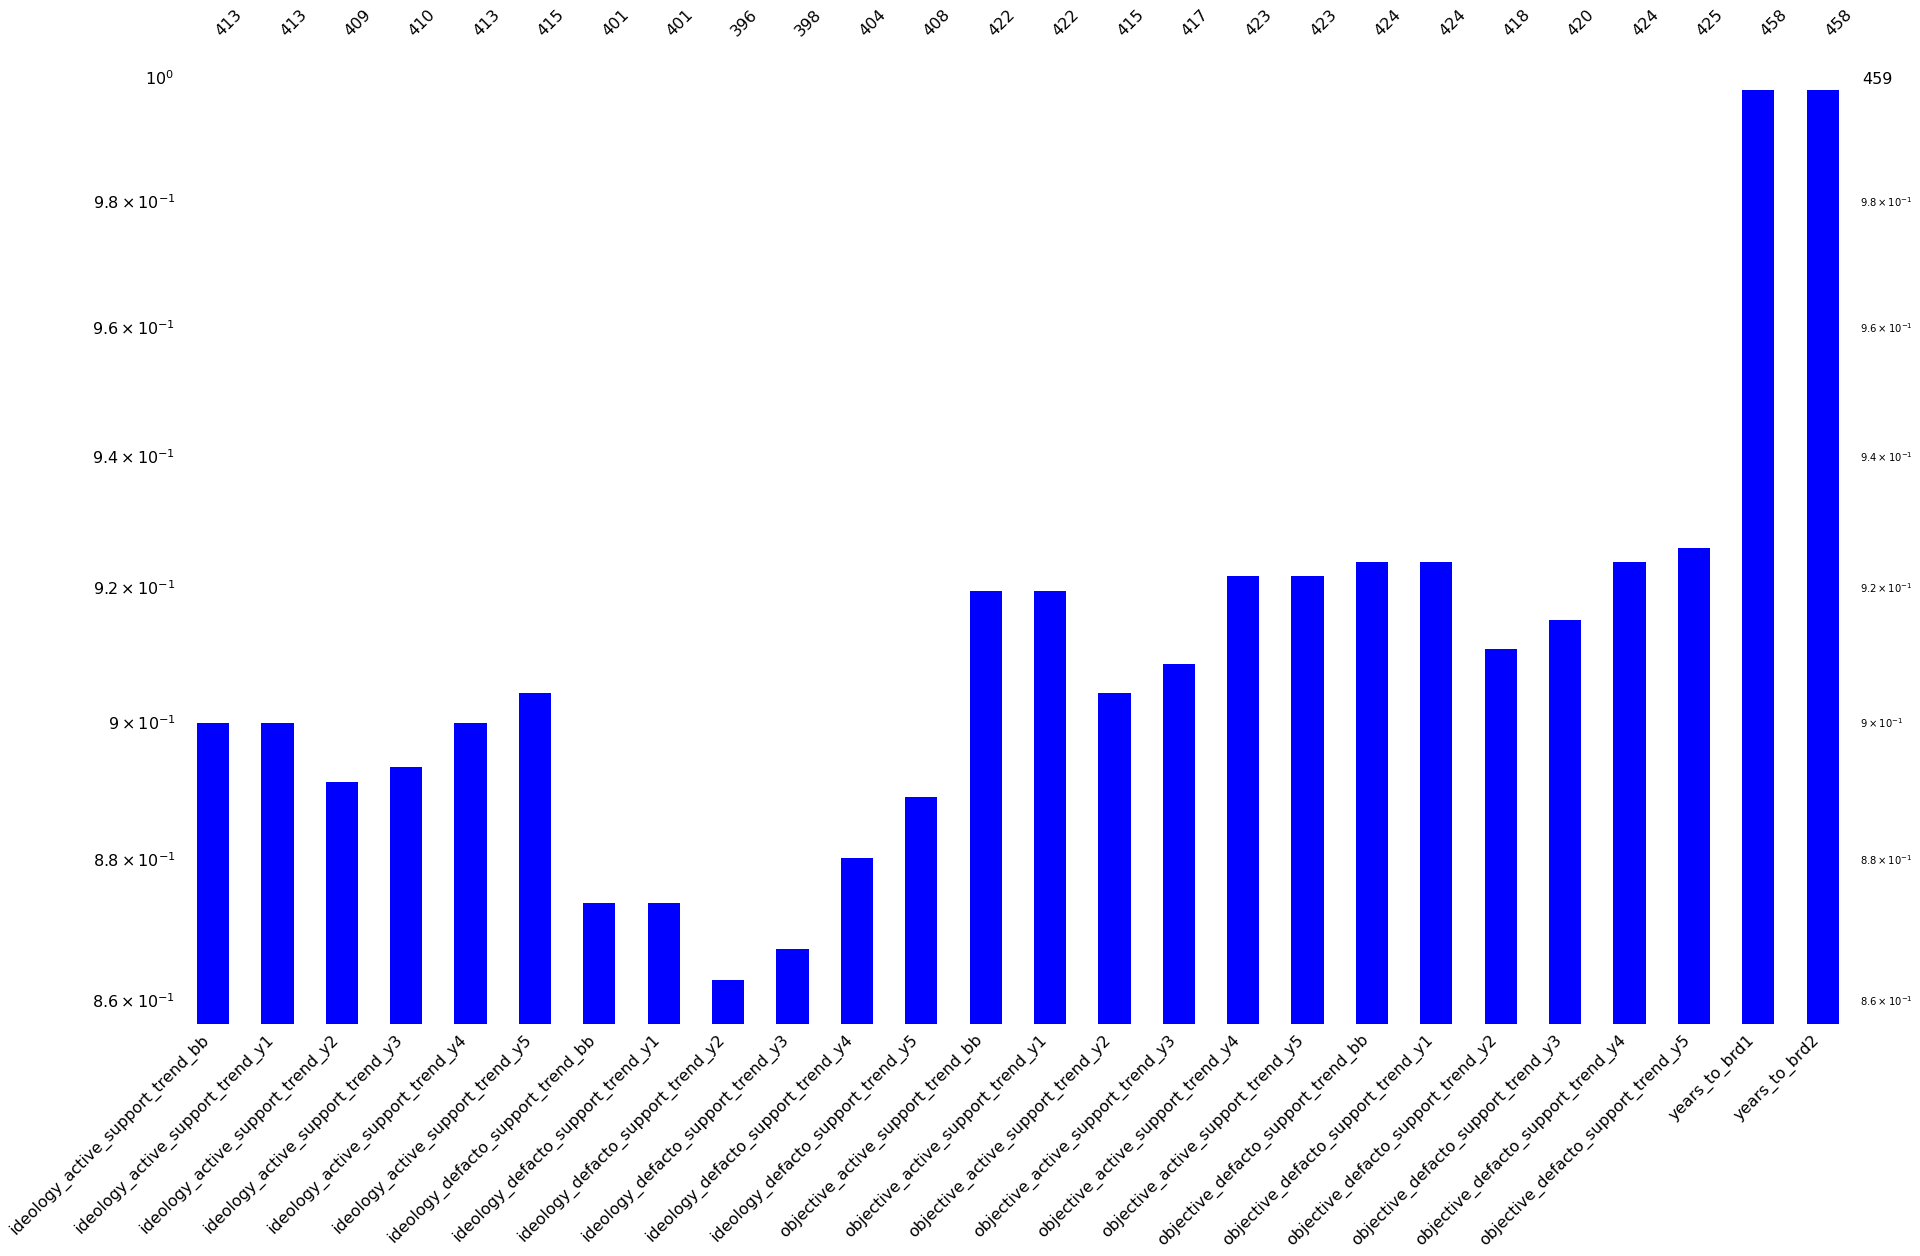

In [57]:
msno.bar(df[missingdata_df], color="blue", log=True, figsize=(30,18))
plt.ylim(0)
plt.savefig("images/missing_data.png", bbox_inches='tight')
plt.show()

In [58]:
delete = ["nag_name", "ideology(s)",'objective(s)']
df.drop(delete, axis=1, inplace=True)

In [67]:
X = df.drop(['nagcode_1', 'lifespan', 'lifespan_group'], axis=1)
y = df[['lifespan']]

In [68]:
X_copy = deepcopy(X)

In [ ]:
X_complete = mice_imputation(X.values)

In [70]:
X_copy[missingdata_df].describe().T.to_csv("missing_column_stats_before.csv")
X_copy[missingdata_df].describe()

,ideology_active_support_trend_bb,ideology_active_support_trend_y1,ideology_active_support_trend_y2,ideology_active_support_trend_y3,ideology_active_support_trend_y4,ideology_active_support_trend_y5,ideology_defacto_support_trend_bb,ideology_defacto_support_trend_y1,ideology_defacto_support_trend_y2,ideology_defacto_support_trend_y3,ideology_defacto_support_trend_y4,ideology_defacto_support_trend_y5,objective_active_support_trend_bb,objective_active_support_trend_y1,objective_active_support_trend_y2,objective_active_support_trend_y3,objective_active_support_trend_y4,objective_active_support_trend_y5,objective_defacto_support_trend_bb,objective_defacto_support_trend_y1,objective_defacto_support_trend_y2,objective_defacto_support_trend_y3,objective_defacto_support_trend_y4,objective_defacto_support_trend_y5,years_to_brd1,years_to_brd2
count,413.000000,413.000000,409.000000,410.000000,413.000000,415.000000,401.000000,401.000000,396.000000,398.000000,404.000000,408.000000,422.000000,422.000000,415.000000,417.000000,423.000000,423.000000,424.000000,424.000000,418.000000,420.000000,424.000000,425.000000,458.000000,458.000000
mean,0.473777,0.473777,0.477524,0.476640,0.467885,0.467955,0.443376,0.443376,0.453926,0.460077,0.490425,0.501947,0.455795,0.455795,0.468477,0.469768,0.466743,0.467829,0.421974,0.421974,0.433004,0.437344,0.469312,0.488867,2.539301,3.635371
std,0.146531,0.146531,0.144427,0.138040,0.131024,0.126176,0.140930,0.140930,0.139993,0.139529,0.139219,0.154979,0.122687,0.122687,0.121890,0.117617,0.112959,0.112676,0.149569,0.149569,0.146815,0.145459,0.149583,0.160917,4.835996,6.459452
min,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.090909,0.090909,0.090909,0.090909,0.111111,0.090909,0.076923,0.076923,0.076923,0.076923,0.076923,0.076923,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.000000,0.000000
25%,0.384615,0.384615,0.387097,0.388889,0.386364,0.395833,0.363636,0.363636,0.369075,0.375000,0.420628,0.411765,0.381200,0.381200,0.406481,0.411111,0.415230,0.405882,0.300000,0.300000,0.308150,0.313298,0.347826,0.363636,0.000000,0.000000
50%,0.471111,0.471111,0.473684,0.473684,0.444444,0.440678,0.470588,0.470588,0.479130,0.482143,0.517857,0.521739,0.466933,0.466933,0.478571,0.478968,0.472222,0.478261,0.437500,0.437500,0.457629,0.461538,0.500000,0.513514,0.000000,1.000000
75%,0.562500,0.562500,0.562500,0.558824,0.553147,0.542395,0.537037,0.537037,0.543860,0.560000,0.591662,0.622917,0.534524,0.534524,0.548858,0.537821,0.522143,0.522727,0.542857,0.542857,0.551020,0.552772,0.598958,0.607143,3.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,0.800000,0.800000,0.800000,0.775000,0.777778,0.875000,0.875000,0.875000,0.875000,0.875000,0.875000,34.000000,38.000000


In [71]:
for i, col in enumerate(X_copy.columns):    
    X_copy[col] = X_complete[:,i]

In [72]:
X_copy[missingdata_df].describe().T.to_csv("missing_column_stats_after.csv")
X_copy[missingdata_df].describe()

,ideology_active_support_trend_bb,ideology_active_support_trend_y1,ideology_active_support_trend_y2,ideology_active_support_trend_y3,ideology_active_support_trend_y4,ideology_active_support_trend_y5,ideology_defacto_support_trend_bb,ideology_defacto_support_trend_y1,ideology_defacto_support_trend_y2,ideology_defacto_support_trend_y3,ideology_defacto_support_trend_y4,ideology_defacto_support_trend_y5,objective_active_support_trend_bb,objective_active_support_trend_y1,objective_active_support_trend_y2,objective_active_support_trend_y3,objective_active_support_trend_y4,objective_active_support_trend_y5,objective_defacto_support_trend_bb,objective_defacto_support_trend_y1,objective_defacto_support_trend_y2,objective_defacto_support_trend_y3,objective_defacto_support_trend_y4,objective_defacto_support_trend_y5,years_to_brd1,years_to_brd2
count,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000,459.000000
mean,0.473777,0.473777,0.471029,0.463129,0.462527,0.462139,0.443376,0.443376,0.456651,0.463360,0.467065,0.480327,0.455795,0.455795,0.466241,0.460875,0.471063,0.472907,0.421974,0.421974,0.434023,0.435897,0.454152,0.484424,2.537765,3.631209
std,0.138978,0.138978,0.144926,0.206219,0.148667,0.156703,0.131705,0.131705,0.163707,0.198792,0.201362,0.213895,0.117627,0.117627,0.131589,0.136500,0.261932,0.257928,0.143741,0.143741,0.144362,0.145406,0.211881,0.239134,4.830825,6.453013
min,0.142857,0.142857,-0.299246,-2.072706,-0.908563,-0.898982,0.090909,0.090909,0.090909,-0.377640,-1.580988,-2.161621,0.076923,0.076923,0.008783,-0.815034,-2.470896,-2.506905,0.083333,0.083333,0.083333,-0.356836,-2.161165,-2.596667,0.000000,0.000000
25%,0.388474,0.388474,0.388060,0.388889,0.386364,0.399625,0.384615,0.384615,0.375325,0.375000,0.391822,0.385451,0.387153,0.387153,0.402381,0.406481,0.416667,0.407292,0.307418,0.307418,0.314906,0.324675,0.347826,0.361107,0.000000,0.000000
50%,0.473777,0.473777,0.466509,0.473684,0.446809,0.446809,0.444444,0.444444,0.470588,0.473684,0.490566,0.500000,0.455795,0.455795,0.472222,0.478261,0.472222,0.475000,0.421974,0.421974,0.444444,0.448276,0.486486,0.500000,0.000000,1.000000
75%,0.553191,0.553191,0.555556,0.552458,0.545455,0.527273,0.529412,0.529412,0.532640,0.541739,0.570278,0.611940,0.522761,0.522761,0.537331,0.524222,0.521739,0.521739,0.538462,0.538462,0.550000,0.551151,0.598958,0.606061,3.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.246115,3.115511,1.000000,1.000000,0.800000,0.800000,1.341675,0.800000,4.086846,3.962587,0.875000,0.875000,0.958543,0.875000,0.875000,2.512841,34.000000,38.000000
